In [1]:
# Final version of the 3DOF topology verification (analytical)

In [3]:
import numpy as np
import math
import sympy as sp
from IPython.display import display
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point, RigidBody, Lagrangian, LagrangesMethod

# learn: kinematcis
t = sp.symbols('t')
l1, l2, l3, b1, b2 = sp.symbols('l_1 l_2 l_3 b_1 b_2')
x3, y3, x4, y4 = sp.symbols('x_3 y_3 x_4 y_4')   # muscle attachment points
d1, d2 = sp.symbols('d_1 d_2')  # bias
beta1, beta2 = sp.symbols('beta_1 beta_2')
m1, m2, m3 = sp.symbols('m_1 m_2 m_3')
g = sp.symbols('g')

# actuator
mm1, mm2, mm3, mk1, mk2, mk3, mc1, mc2, mc3, l10, l20, l30 = sp.symbols('mm_1 mm_2 mm_3 mk_1 mk_2 mk_3 mc_1 mc_2 mc_3 l10 l20 l30')

# Generalized coordinates
theta1, theta2, theta3 = dynamicsymbols('theta_1 theta_2 theta_3')
theta1d, theta2d, theta3d = dynamicsymbols('theta_1 theta_2 theta_3', 1)

# Link0
N = ReferenceFrame('N')
L_1 = N.orientnew('L_1', 'Axis', [theta1, N.z])    # Reference frame L_1
L_2 = L_1.orientnew('L_2', 'Axis', [theta2, N.z])  # Reference frame L_2
L_3 = L_2.orientnew('L_3', 'Axis', [theta3, N.z])  # Reference frame L_3

O = Point('O')
A = O.locatenew('A', d1 * N.x)
B = O.locatenew('B', -d2 * N.x)

# origin for other frames
# Link1
O_1 = O.locatenew('O_1', 0)
E = O_1.locatenew('E', l1 * L_1.x)
C = O_1.locatenew('C', b1 * sp.cos(-beta1) * L_1.x + b1 * sp.sin(-beta1) * L_1.y)

# Link2
O_2 = O_1.locatenew('O_2', l1 * L_1.x)  # namely, A
F = O_2.locatenew('F', l2 * L_2.x)
D = O_2.locatenew('D', b2 * sp.cos(beta2) * L_2.x + b2 * sp.sin(beta2) * L_2.y)
# anchor 1
H = O_2.locatenew('H', x3 * L_2.x + y3 * L_2.y)

# Linmk1
O_3 = O_2.locatenew('O_3', l2 * L_2.x)
G = O_3.locatenew('G', l3 * L_3.x)
I = O_3.locatenew('I', x4 * L_3.x + y4 * L_3.y)

O_pos = O.pos_from(O).express(N).simplify()
A_pos = A.pos_from(O).express(N).simplify()
B_pos = B.pos_from(O).express(N).simplify()
C_pos = C.pos_from(O).express(N).simplify()
D_pos = D.pos_from(O).express(N).simplify()
E_pos = E.pos_from(O).express(N).simplify()
F_pos = F.pos_from(O).express(N).simplify()
G_pos = G.pos_from(O).express(N).simplify()
H_pos = H.pos_from(O).express(N).simplify()
I_pos = I.pos_from(O).express(N).simplify()

print("--pos check--")
display(O_pos)
display(A_pos)
display(B_pos)
display(C_pos)
display(D_pos)
display(E_pos)
display(F_pos)
display(G_pos)
display(H_pos)
display(I_pos)

O.set_vel(N, 0)  
A.v2pt_theory(O, N, N)  
B.v2pt_theory(O, N, N)  
C.v2pt_theory(O_1, N, L_1)
E.v2pt_theory(O_1, N, L_1)
D.v2pt_theory(O_2, N, L_2)
F.v2pt_theory(O_2, N, L_2)
H.v2pt_theory(O_2, N, L_2)
G.v2pt_theory(O_3, N, L_3)
I.v2pt_theory(O_3, N, L_3)

_A_vel = A.vel(N).express(N).simplify()
_B_vel = B.vel(N).express(N).simplify()
_C_vel = C.vel(N).express(N).simplify()
_D_vel = D.vel(N).express(N).simplify()
_E_vel = E.vel(N).express(N).simplify()
_F_vel = F.vel(N).express(N).simplify()
_G_vel = G.vel(N).express(N).simplify()
_H_vel = H.vel(N).express(N).simplify()
_I_vel = I.vel(N).express(N).simplify()
print("--vel check(using original vel)--")
display(_A_vel)
display(_B_vel)
display(_C_vel)
display(_D_vel)
display(_E_vel)
display(_F_vel)
display(_G_vel)
display(_H_vel)
display(_I_vel)

A_v = sp.diff(A_pos, t, N)
B_v = sp.diff(B_pos, t, N)
C_v = sp.diff(C_pos, t, N)
D_v = sp.diff(D_pos, t, N)
E_v = sp.diff(E_pos, t, N)
F_v = sp.diff(F_pos, t, N)
G_v = sp.diff(G_pos, t, N)
H_v = sp.diff(H_pos, t, N)
I_v = sp.diff(I_pos, t, N)

print("--vel check--")
display(A_v)
display(B_v)
display(C_v)
display(D_v)
display(E_v)
display(F_v)
display(G_v)
display(H_v)
display(I_v)

--pos check--


0

d_1*N.x

- d_2*N.x

b_1*cos(beta_1 - theta_1(t))*N.x - b_1*sin(beta_1 - theta_1(t))*N.y

(b_2*cos(beta_2 + theta_1(t) + theta_2(t)) + l_1*cos(theta_1(t)))*N.x + (b_2*sin(beta_2 + theta_1(t) + theta_2(t)) + l_1*sin(theta_1(t)))*N.y

l_1*cos(theta_1(t))*N.x + l_1*sin(theta_1(t))*N.y

(l_1*cos(theta_1(t)) + l_2*cos(theta_1(t) + theta_2(t)))*N.x + (l_1*sin(theta_1(t)) + l_2*sin(theta_1(t) + theta_2(t)))*N.y

(l_1*cos(theta_1(t)) + l_2*cos(theta_1(t) + theta_2(t)) + l_3*cos(theta_1(t) + theta_2(t) + theta_3(t)))*N.x + (l_1*sin(theta_1(t)) + l_2*sin(theta_1(t) + theta_2(t)) + l_3*sin(theta_1(t) + theta_2(t) + theta_3(t)))*N.y

(l_1*cos(theta_1(t)) + x_3*cos(theta_1(t) + theta_2(t)) - y_3*sin(theta_1(t) + theta_2(t)))*N.x + (l_1*sin(theta_1(t)) + x_3*sin(theta_1(t) + theta_2(t)) + y_3*cos(theta_1(t) + theta_2(t)))*N.y

(l_1*cos(theta_1(t)) + l_2*cos(theta_1(t) + theta_2(t)) + x_4*cos(theta_1(t) + theta_2(t) + theta_3(t)) - y_4*sin(theta_1(t) + theta_2(t) + theta_3(t)))*N.x + (l_1*sin(theta_1(t)) + l_2*sin(theta_1(t) + theta_2(t)) + x_4*sin(theta_1(t) + theta_2(t) + theta_3(t)) + y_4*cos(theta_1(t) + theta_2(t) + theta_3(t)))*N.y

--vel check(using original vel)--


0

0

b_1*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.x + b_1*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.y

(-b_2*sin(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_1(t), t) - b_2*sin(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_2(t), t) - l_1*sin(theta_1(t))*Derivative(theta_1(t), t))*N.x + (b_2*cos(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_1(t), t) + b_2*cos(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_2(t), t) + l_1*cos(theta_1(t))*Derivative(theta_1(t), t))*N.y

- l_1*sin(theta_1(t))*Derivative(theta_1(t), t)*N.x + l_1*cos(theta_1(t))*Derivative(theta_1(t), t)*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - l_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*sin(theta_1(t) + theta_2(t) + theta_3(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)) + l_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*cos(theta_1(t) + theta_2(t) + theta_3(t)))*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - x_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - y_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + x_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)) - y_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - x_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*sin(theta_1(t) + theta_2(t) + theta_3(t)) - y_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*cos(theta_1(t) + theta_2(t) + theta_3(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)) + x_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*cos(theta_1(t) + theta_2(t) + theta_3(t)) - y_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*sin(theta_1(t) + theta_2(t) + theta_3(t)))*N.y

--vel check--


0

0

b_1*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.x + b_1*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.y

(-b_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(beta_2 + theta_1(t) + theta_2(t)) - l_1*sin(theta_1(t))*Derivative(theta_1(t), t))*N.x + (b_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(beta_2 + theta_1(t) + theta_2(t)) + l_1*cos(theta_1(t))*Derivative(theta_1(t), t))*N.y

- l_1*sin(theta_1(t))*Derivative(theta_1(t), t)*N.x + l_1*cos(theta_1(t))*Derivative(theta_1(t), t)*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - l_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*sin(theta_1(t) + theta_2(t) + theta_3(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)) + l_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*cos(theta_1(t) + theta_2(t) + theta_3(t)))*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - x_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - y_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + x_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)) - y_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - x_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*sin(theta_1(t) + theta_2(t) + theta_3(t)) - y_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*cos(theta_1(t) + theta_2(t) + theta_3(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)) + x_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*cos(theta_1(t) + theta_2(t) + theta_3(t)) - y_4*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))*sin(theta_1(t) + theta_2(t) + theta_3(t)))*N.y

In [4]:
# T and V

# Link
## T
I1 = 1/12 * m1 * l1**2  # Link1 
I2 = 1/12 * m2 * l2**2  # Link2
I3 = 1/12 * m3 * l3**2  # Muscle1
v_l1_com = 0.5 * (0 + E_v).magnitude()
v_l2_com = 0.5 * (E_v + F_v).magnitude()
v_l3_com = 0.5 * (F_v + G_v).magnitude()
T_l1 = 1/2 * m1 * v_l1_com**2 + 1/2 * I1 * theta1d**2
T_l2 = 1/2 * m2 * v_l2_com**2 + 1/2 * I2 * (theta1d + theta2d)**2
T_l3 = 1/2 * m3 * v_l3_com**2 + 1/2 * I3 * (theta1d + theta2d + theta3d)**2

## Vg
pos_l1_com = 0.5 * (O_pos + E_pos)
pos_l2_com = 0.5 * (E_pos + F_pos)
pos_l3_com = 0.5 * (F_pos + G_pos)
Vg_l1 = -m1 * g * pos_l1_com.dot(N.y)
Vg_l2 = -m2 * g * pos_l2_com.dot(N.y)
Vg_l3 = -m3 * g * pos_l3_com.dot(N.y)

# Muscle
## T
T_muscle1 = 1/6 * mm1 * (C_v.magnitude()**2 + A_v.magnitude()**2 + A_v.dot(C_v))
T_muscle2 = 1/6 * mm2 * (B_v.magnitude()**2 + D_v.magnitude()**2 + D_v.dot(B_v))
T_muscle3 = 1/6 * mm3 * (H_v.magnitude()**2 + I_v.magnitude()**2 + I_v.dot(H_v))

## Vg
pos_muscle1_com = 0.5 * (C_pos + A_pos)
pos_muscle2_com = 0.5 * (B_pos + D_pos)
pos_muscle3_com = 0.5 * (H_pos + I_pos)
Vg_muscle1 = -mm1 * g * pos_muscle1_com.dot(N.y)
Vg_muscle2 = -mm2 * g * pos_muscle2_com.dot(N.y)
Vg_muscle3 = -mm3 * g * pos_muscle3_com.dot(N.y)

## Ve
Ve_muscle1 = mk1 * ((C_pos - A_pos).magnitude()-l10)**2 / 2
Ve_muscle2 = mk2 * ((B_pos - D_pos).magnitude()-l20)**2 / 2
Ve_muscle3 = mk3 * ((H_pos - I_pos).magnitude()-l30)**2 / 2

# Generalized forces (later)

print("--T and V check--")
print("T of link1: ", T_l1)
print("T of link2: ", T_l2)
print("T of link3: ", T_l3)
print("Vg of link1: ", Vg_l1)
print("Vg of link2: ", Vg_l2)
print("Vg of link3: ", Vg_l3)
print("T of muscle1: ", T_muscle1)
print("T of muscle2: ", T_muscle2)
print("T of muscle3: ", T_muscle3)
print("Vg of muscle1: ", Vg_muscle1)
print("Vg of muscle2: ", Vg_muscle2)
print("Vg of muscle3: ", Vg_muscle3)
print("Ve of muscle1: ", Ve_muscle1)
print("Ve of muscle2: ", Ve_muscle2)
print("Ve of muscle3: ", Ve_muscle3)

# totally right!

--T and V check--
T of link1:  0.0416666666666667*l_1**2*m_1*Derivative(theta_1(t), t)**2 + 0.5*m_1*(0.25*l_1**2*sin(theta_1(t))**2*Derivative(theta_1(t), t)**2 + 0.25*l_1**2*cos(theta_1(t))**2*Derivative(theta_1(t), t)**2)
T of link2:  0.0416666666666667*l_2**2*m_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))**2 + 0.5*m_2*(0.25*(-2*l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))**2 + 0.25*(2*l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))**2)
T of link3:  0.0416666666666667*l_3**2*m_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivative(theta_3(t), t))**2 + 0.5*m_3*(0.25*(-2*l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - 2*l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)) - l_3*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t) + Derivativ

In [5]:
# Dynamic Equations
T = T_l1 + T_l2 + T_l3 + T_muscle1 + T_muscle2 + T_muscle3
Vg = Vg_l1 + Vg_l2 + Vg_l3 + Vg_muscle1 + Vg_muscle2 + Vg_muscle3 + Ve_muscle1 + Ve_muscle2 + Ve_muscle3
L = T - Vg

# Generalized Forces
F1 = sp.Function('F_1')(t)
F2 = sp.Function('F_2')(t)
F3 = sp.Function('F_3')(t)
e_AC = (C_pos - A_pos).normalize()
e_CA = (A_pos - C_pos).normalize()
e_BD = (D_pos - B_pos).normalize()
e_DB = (B_pos - D_pos).normalize()
e_HI = (I_pos - H_pos).normalize()
e_IH = (H_pos - I_pos).normalize()

# TODO: check singularity
vec_AC = C_pos - A_pos
vel_AC = sp.diff(vec_AC, t, N)
ld_AC = (vec_AC.dot(vel_AC)) / vec_AC.magnitude()

vec_BD = D_pos - B_pos
vel_BD = sp.diff(vec_BD, t, N)
ld_BD = (vec_BD.dot(vel_BD)) / vec_BD.magnitude()

vec_HI = I_pos - H_pos
vel_HI = sp.diff(vec_HI, t, N)
ld_HI = (vec_HI.dot(vel_HI)) / vec_HI.magnitude()

# need to define velocity for generalized forces

FL = [(C, (F1-mc1*ld_AC) * e_AC), (A, (F1-mc1*ld_AC) * e_CA), 
      (D, (F2-mc2*ld_BD) * e_BD), (B, (F2-mc2*ld_BD) * e_DB),
      (I, (F3-mc3*ld_HI) * e_HI), (H, (F3-mc3*ld_HI) * e_IH)]

# Solve Dynamic Equations
# NOTE: Velocity here is automatically calculated (implicit calculation)
LM = LagrangesMethod(L, [theta1, theta2, theta3], forcelist=FL, frame=N)
LM.form_lagranges_equations()

Matrix([
[-0.5*b_1*g*mm_1*cos(beta_1 - theta_1(t)) - b_1*(-b_1*(-mc_1*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + b_1*(b_1*cos(beta_1 - theta_1(t)) - d_1)*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + F_1(t))*sin(beta_1 - theta_1(t))*sin(theta_1(t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + (b_1*cos(beta_1 - theta_1(t)) - d_1)*(-mc_1*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + b_1*(b_1*cos(beta_1 - theta_1(t)) - d_1)*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + F_1(t))*cos(theta_1(t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2))*sin(beta_1) - b_1*(-b_1*(-mc_1*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t

In [6]:
M = LM.mass_matrix          
F = LM.forcing              
M, F

(Matrix([
 [0.0833333333333333*l_1**2*m_1 + 0.0833333333333333*l_2**2*m_2 + 0.0833333333333333*l_3**2*m_3 + 0.5*m_1*(0.5*l_1**2*sin(theta_1(t))**2 + 0.5*l_1**2*cos(theta_1(t))**2) + 0.5*m_2*(0.25*(-4*l_1*sin(theta_1(t)) - 2*l_2*sin(theta_1(t) + theta_2(t)))*(-2*l_1*sin(theta_1(t)) - l_2*sin(theta_1(t) + theta_2(t))) + 0.25*(2*l_1*cos(theta_1(t)) + l_2*cos(theta_1(t) + theta_2(t)))*(4*l_1*cos(theta_1(t)) + 2*l_2*cos(theta_1(t) + theta_2(t)))) + 0.5*m_3*(0.25*(-4*l_1*sin(theta_1(t)) - 4*l_2*sin(theta_1(t) + theta_2(t)) - 2*l_3*sin(theta_1(t) + theta_2(t) + theta_3(t)))*(-2*l_1*sin(theta_1(t)) - 2*l_2*sin(theta_1(t) + theta_2(t)) - l_3*sin(theta_1(t) + theta_2(t) + theta_3(t))) + 0.25*(2*l_1*cos(theta_1(t)) + 2*l_2*cos(theta_1(t) + theta_2(t)) + l_3*cos(theta_1(t) + theta_2(t) + theta_3(t)))*(4*l_1*cos(theta_1(t)) + 4*l_2*cos(theta_1(t) + theta_2(t)) + 2*l_3*cos(theta_1(t) + theta_2(t) + theta_3(t)))) + 0.166666666666667*mm_1*(2*b_1**2*sin(beta_1 - theta_1(t))**2 + 2*b_1**2*cos(beta_1 - t

In [7]:
from sympy.utilities.lambdify import lambdify

states = [theta1, theta2, theta3, theta1.diff(), theta2.diff(), theta3.diff()]
params = [l1, l2, l3, 
          b1, b2, d1, d2, beta1, beta2, 
          x3, y3, x4, y4, 
          g, m1, m2, m3, 
          mm1, mm2, mm3, 
          mk1, mk2, mk3, 
          mc1, mc2, mc3, 
          l10, l20, l30]
forces = [F1, F2, F3]

qdd_expr = M.LUsolve(F) 

# transfer the qdd_expr into a NumPy function, can be used for numerical simulation
qdd_func = lambdify(states + params + forces, qdd_expr, 'numpy')

In [8]:
# # using lambdify to create the traj plotter
# point_names = ['O', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
# point_exprs = [O_pos, A_pos, B_pos, C_pos, D_pos, E_pos, F_pos, G_pos, H_pos, I_pos]

# pos_funcs = {
#     name: lambdify([theta1, theta2, theta3] + params, expr, 'numpy')
#     for name, expr in zip(point_names, point_exprs)
# }

# # giving the state to calulate the position
# θs = theta1s[frame], theta2s[frame], theta3s[frame]
# inputs = list(θs) + list(geom_params.values())

# C_pos_xy = pos_funcs['C'](*inputs)[:2]

In [9]:
import numpy as np
from scipy.integrate import solve_ivp

def F1_func(t): return 0 if t < 10 else ((t//10)%3 + 1) * 2
def F2_func(t): return 0 if t < 10 else (((t//10)+1)%3 + 1) * 2
def F3_func(t): return 0 if t < 10 else (((t//10)+2)%3 + 1) * 2

def dyn_ode(t, y, *p):
    theta1, theta2, theta3, theta1d, theta2d, theta3d = y
    F1 = F1_func(t)
    F2 = F2_func(t)
    F3 = F3_func(t)
    theta_dd = qdd_func(theta1, theta2, theta3, theta1d, theta2d, theta3d, *p, F1, F2, F3)
    theta_dd = np.squeeze(np.array(theta_dd)).flatten()
    return [theta1d, theta2d, theta3d, theta_dd[0], theta_dd[1], theta_dd[2]]


class OldParameter():
    a_1 = 0.25
    a_2 = 0.25
    l_3 = 0.25
    b_1 = 0.21213
    b_2 = 0.1
    d_1 = 0.06
    d_2 = 0.10
    s = 0

    M = 0.155  # real value
    m_1, m_2 = 0.086, 0.1033
    I_1, I_2 = (1/12 * m_1 * 0.25**2), (1/12 * m_2 * 0.25**2)

    # NOTE: Use measured value here
    m_3, m_4 = 0.18648, 0.27266
    k_3, k_4 = 637.52/2, 631.6/2
    l_10, l_20 = 0.174, 0.2562

    # damping 
    c_3, c_4 = 22.68/2, 21.8/2

    g = 9.8
    beta_1 = 8.13 / 180 * np.pi
    beta_2 = 30 / 180 * np.pi

    x_3 = 0.1
    y_3 = 0.1
    x_4 = 0.1
    y_4 = 0.05
    lm_3 = 0.1033
    mm_3 = 0.18
    mk_3 = k_4
    mc_3 = c_4
    l_30 = 0.2549509756

# let F1 = F2 = 0
_F1 = 0
_F2 = 0
param_vals = [OldParameter.a_1, OldParameter.a_2, OldParameter.l_3,
              OldParameter.b_1, OldParameter.b_2, OldParameter.d_1, OldParameter.d_2, OldParameter.beta_1, OldParameter.beta_2, 
              OldParameter.x_3, OldParameter.y_3, OldParameter.x_4, OldParameter.y_4,
              OldParameter.g, OldParameter.m_1, OldParameter.m_2, OldParameter.lm_3,
              OldParameter.m_3, OldParameter.m_4,  OldParameter.mm_3,
              OldParameter.k_3, OldParameter.k_4, OldParameter.mk_3,
              OldParameter.c_3, OldParameter.c_4, OldParameter.mc_3,
              OldParameter.l_10, OldParameter.l_20, OldParameter.l_30]
y0 = [np.pi/2, 0, 0, 0.0, 0.0, 0.0]
t_span = (0, 40)
t_eval = np.linspace(*t_span, 500)

def blow_up_event(t, y, *args):
    max_state = np.max(np.abs(y))  
    return 1e3 - max_state          
blow_up_event.terminal = True       
blow_up_event.direction = -1        

# Simulation
sol = solve_ivp(dyn_ode, t_span, y0, args=tuple(param_vals), t_eval=t_eval, method='Radau',
    events=blow_up_event)

In [10]:
print(sol.t)

[ 0.          0.08016032  0.16032064  0.24048096  0.32064128  0.4008016
  0.48096192  0.56112224  0.64128257  0.72144289  0.80160321  0.88176353
  0.96192385  1.04208417  1.12224449  1.20240481  1.28256513  1.36272545
  1.44288577  1.52304609  1.60320641  1.68336673  1.76352705  1.84368737
  1.9238477   2.00400802  2.08416834  2.16432866  2.24448898  2.3246493
  2.40480962  2.48496994  2.56513026  2.64529058  2.7254509   2.80561122
  2.88577154  2.96593186  3.04609218  3.12625251  3.20641283  3.28657315
  3.36673347  3.44689379  3.52705411  3.60721443  3.68737475  3.76753507
  3.84769539  3.92785571  4.00801603  4.08817635  4.16833667  4.24849699
  4.32865731  4.40881764  4.48897796  4.56913828  4.6492986   4.72945892
  4.80961924  4.88977956  4.96993988  5.0501002   5.13026052  5.21042084
  5.29058116  5.37074148  5.4509018   5.53106212  5.61122244  5.69138277
  5.77154309  5.85170341  5.93186373  6.01202405  6.09218437  6.17234469
  6.25250501  6.33266533  6.41282565  6.49298597  6.5

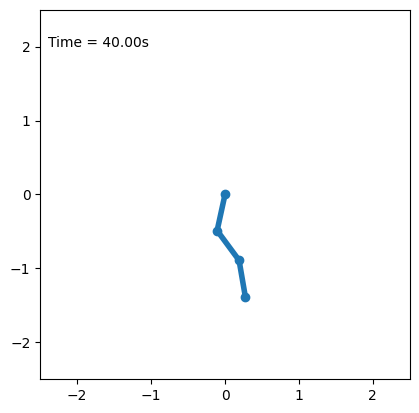

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

l1_val = 0.5
l2_val = 0.5
l3_val = 0.5

theta1_vals = sol.y[0]
theta2_vals = sol.y[1]
theta3_vals = sol.y[2]
x0, y0 = 0, 0

x1 = l1_val * np.cos(theta1_vals)
y1 = l1_val * np.sin(theta1_vals)

x2 = x1 + l2_val * np.cos(theta1_vals + theta2_vals)
y2 = y1 + l2_val * np.sin(theta1_vals + theta2_vals)

x3 = x2 + l3_val * np.cos(theta1_vals + theta2_vals + theta3_vals)
y3 = y2 + l3_val * np.sin(theta1_vals + theta2_vals + theta3_vals)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
line, = ax.plot([], [], 'o-', lw=4)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(i):
    thisx = np.array([x0, x1[i], x2[i], x3[i]])
    thisy = np.array([y0, y1[i], y2[i], y3[i]])
    line.set_data(-thisx, -thisy)
    time_text.set_text(f'Time = {sol.t[i]:.2f}s')
    return line, time_text

ani = animation.FuncAnimation(
    fig, update, frames=len(sol.t),
    init_func=init, blit=True, interval=30
)

# ani.save('double_pendulum.mp4', writer='ffmpeg', fps=30)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [12]:
print(sol.t)

[ 0.          0.08016032  0.16032064  0.24048096  0.32064128  0.4008016
  0.48096192  0.56112224  0.64128257  0.72144289  0.80160321  0.88176353
  0.96192385  1.04208417  1.12224449  1.20240481  1.28256513  1.36272545
  1.44288577  1.52304609  1.60320641  1.68336673  1.76352705  1.84368737
  1.9238477   2.00400802  2.08416834  2.16432866  2.24448898  2.3246493
  2.40480962  2.48496994  2.56513026  2.64529058  2.7254509   2.80561122
  2.88577154  2.96593186  3.04609218  3.12625251  3.20641283  3.28657315
  3.36673347  3.44689379  3.52705411  3.60721443  3.68737475  3.76753507
  3.84769539  3.92785571  4.00801603  4.08817635  4.16833667  4.24849699
  4.32865731  4.40881764  4.48897796  4.56913828  4.6492986   4.72945892
  4.80961924  4.88977956  4.96993988  5.0501002   5.13026052  5.21042084
  5.29058116  5.37074148  5.4509018   5.53106212  5.61122244  5.69138277
  5.77154309  5.85170341  5.93186373  6.01202405  6.09218437  6.17234469
  6.25250501  6.33266533  6.41282565  6.49298597  6.5

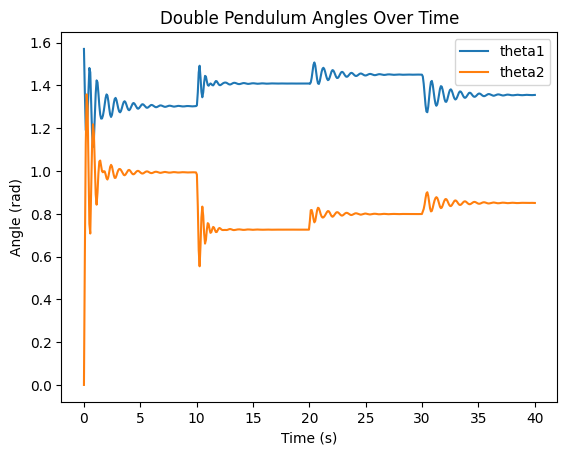

In [13]:
plt.plot(sol.t, sol.y[0], label='theta1')
plt.plot(sol.t, sol.y[1], label='theta2')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Double Pendulum Angles Over Time')
plt.legend()
plt.show()

In [14]:
# save data for analysis
import pandas as pd
data = {
    'time': sol.t,
    'theta1': sol.y[0],
    'theta2': sol.y[1],
    'theta3': sol.y[2],
}
df = pd.DataFrame(data)
# df.to_csv('data_sp_withkc.csv', index=False)
df.to_csv('./test_data/data_sp.csv', index=False)